In [5]:
#%pip install shap
# https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/tree_based_models/Census%20income%20classification%20with%20XGBoost.html
from sklearn.model_selection import train_test_split
import xgboost
import shap
import numpy as np
import matplotlib.pylab as pl
import pandas as pd

# print the JS visualization code to the notebook
shap.initjs()


In [6]:
dataset=pd.read_csv('/home/jiayi/5moU/data/DL_fromTombo/all_AGTTC.csv')
dataset

indx   kmer    mean_1    mean_2    mean_3    mean_4    mean_5     std_1  \
0      260  AGTTC  0.513199  0.397293 -0.850444 -0.837177 -0.786233  0.047088   
1      259  AGTTC  0.589209  0.568374 -0.717482 -0.762448 -0.789418  0.062266   
2      243  AGTTC  0.458838  0.109656 -0.797939 -0.820008 -0.756034  0.149853   
3      260  AGTTC  0.457595  0.472804 -0.688376 -0.681815 -0.679743  0.060894   
4      260  AGTTC  0.528384  0.423719 -0.713185 -0.825872 -0.800544  0.029393   
...    ...    ...       ...       ...       ...       ...       ...       ...   
2628   260  AGTTC  0.787659  0.405793 -0.611869 -0.739305 -0.605124  0.169036   
2629   161  AGTTC  0.396310  0.499622 -0.619268 -0.546544 -0.762006  0.090910   
2630   240  AGTTC  0.589990  0.614284 -0.632994 -0.789089 -0.753708  0.172348   
2631   260  AGTTC  0.661435  0.551367 -0.694797 -0.734620 -0.571503  0.110638   
2632    33  AGTTC  0.695724  0.689144 -0.430299 -0.333123 -0.287625  0.108741   

         std_2     std_3  ...  mdintense_2  mdintense_3  mdintense_4  \
0     0.272815  0.031234  ...     0.471305    -0.846254    -0.839970   
1     0.080098  0.038712  ...     0.579342    -0.727349    -0.763294   
2     0.419986  0.034345  ...     0.190347    -0.796560    -0.817250   
3     0.174125  0.025067  ...     0.513802    -0.686393    -0.686393   
4     0.277885  0.162593  ...     0.522379    -0.768558    -0.826600   
...        ...       ...  ...          ...          ...          ...   
2628  0.279195  0.138040  ...     0.463995    -0.667700    -0.744655   
2629  0.031997  0.130815  ...     0.500937    -0.642935    -0.607435   
2630  0.280588  0.188418  ...     0.688070    -0.685807    -0.796713   
2631  0.231089  0.049018  ...     0.548295    -0.676666    -0.739763   
2632  0.156471  0.050444  ...     0.696973    -0.444039    -0.335371   

      mdintense_5  L-1  L-2  L-3  L-4  L-5  label  
0       -0.768751    6   81    6   15  104      1  
1       -0.799239    6   32    6   15   90      1  
2       -0.755180   13    6    6   33   63      1  
3       -0.696311    6   78    6   13  108      1  
4       -0.792575    6   51    6   11  108      1  
...           ...  ...  ...  ...  ...  ...    ...  
2628    -0.604325   32   14    6   11   17      0  
2629    -0.786905   39    6    6   16   16      0  
2630    -0.751445    6   40    6   19    6      0  
2631    -0.576580   33   34    6   11    6      0  
2632    -0.290405    6   56    6   20   31      0  

[2633 rows x 23 columns]

In [8]:
# create a train/test split
X=dataset.iloc[:,2:dataset.shape[1]-1]
y=dataset['label']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=7)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
d_train = xgboost.DMatrix(X_train, label=y_train)
d_test = xgboost.DMatrix(X_test, label=y_test)

In [9]:
params = {
    "eta": 0.01,
    "objective": "binary:logistic",
    "subsample": 0.5,
    "base_score": np.mean(y_train),
    "eval_metric": "logloss"
}
model = xgboost.train(params, d_train, 5000, evals = [(d_test, "test")], verbose_eval=100, early_stopping_rounds=20)

[0]	test-logloss:0.34034
[100]	test-logloss:0.12434
[200]	test-logloss:0.07008
[300]	test-logloss:0.04949
[400]	test-logloss:0.03995
[500]	test-logloss:0.03529
[600]	test-logloss:0.03191
[700]	test-logloss:0.03049
[800]	test-logloss:0.02917
[900]	test-logloss:0.02877
[975]	test-logloss:0.02872


In [11]:
# this takes a minute or two since we are explaining over 30 thousand samples in a model with over a thousand trees
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

In [13]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])


In [14]:
shap.force_plot(explainer.expected_value, shap_values[:1000,:], X.iloc[:1000,:])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


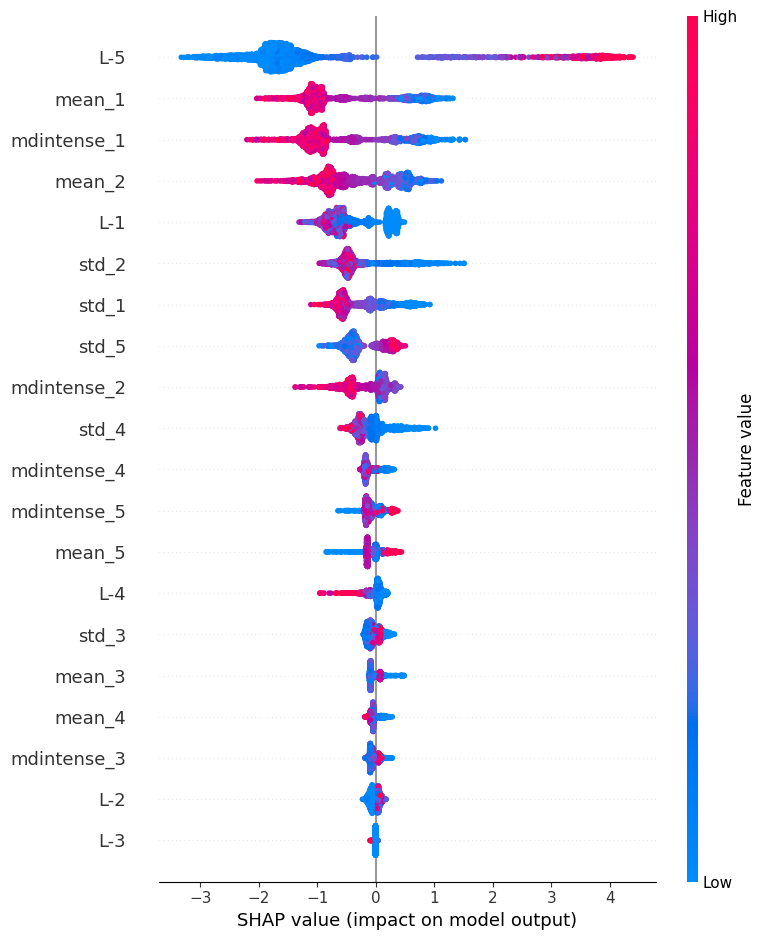

In [15]:
shap.summary_plot(shap_values, X)

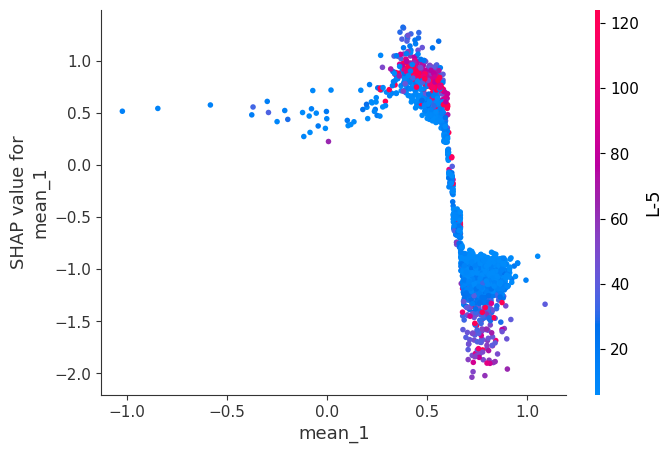

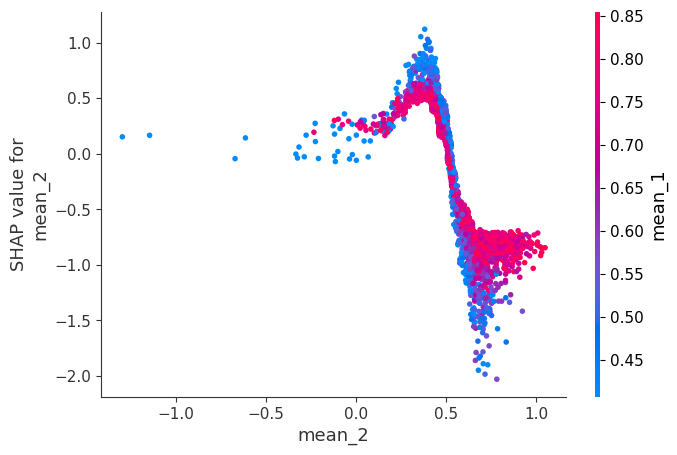

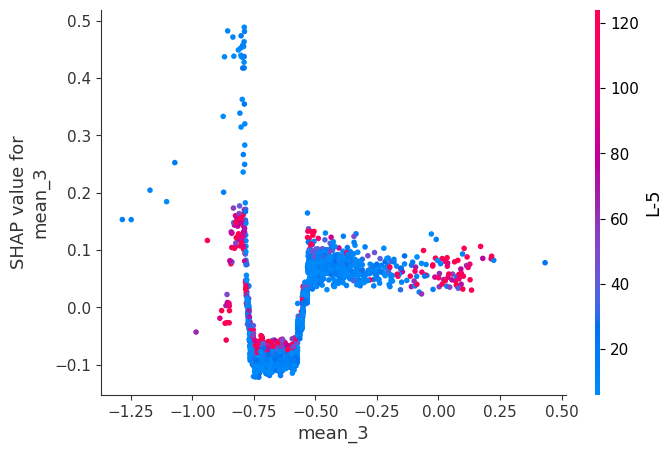

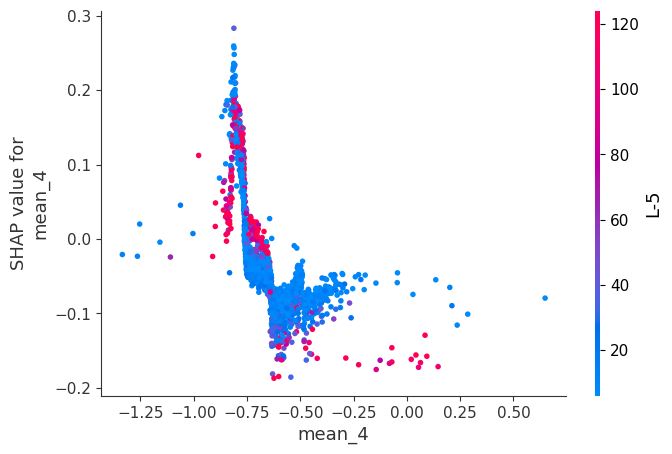

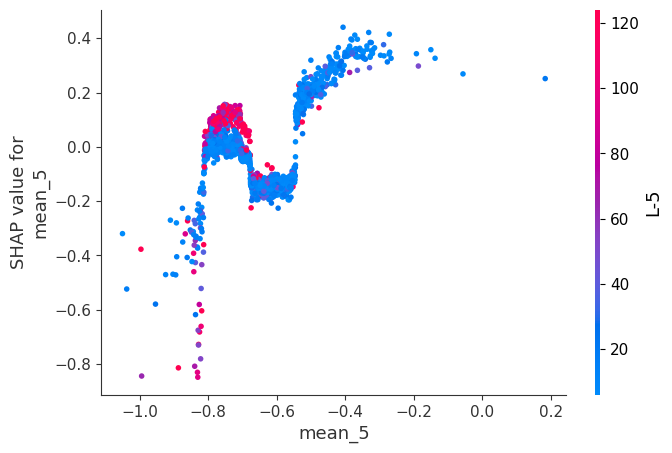

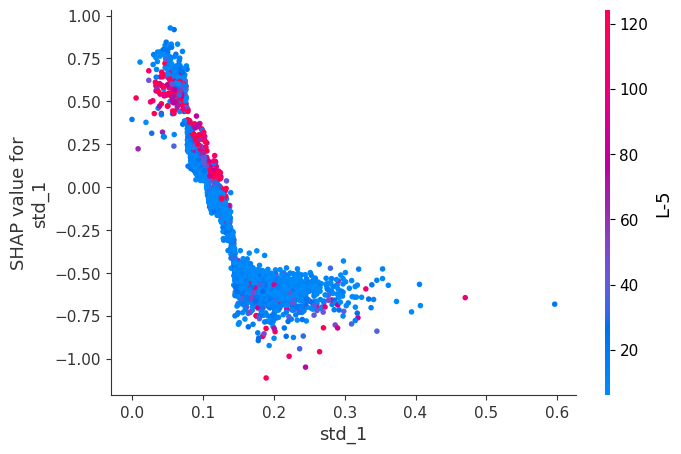

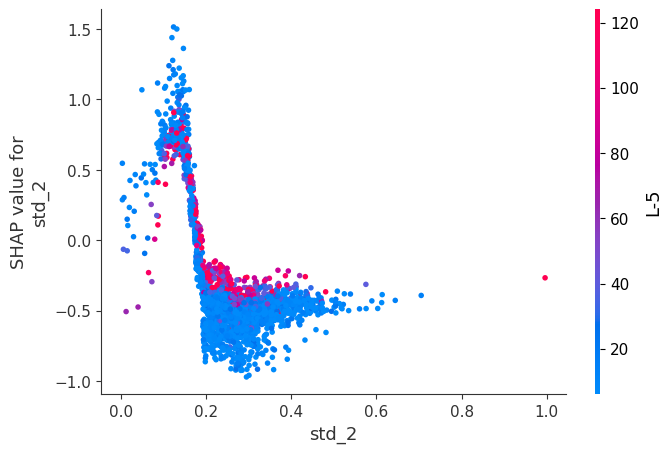

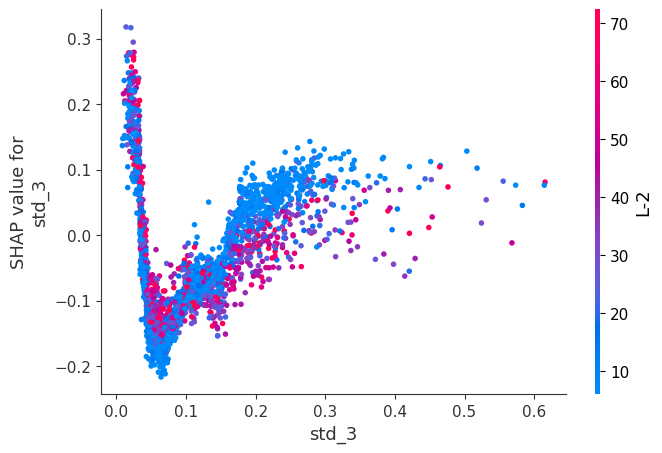

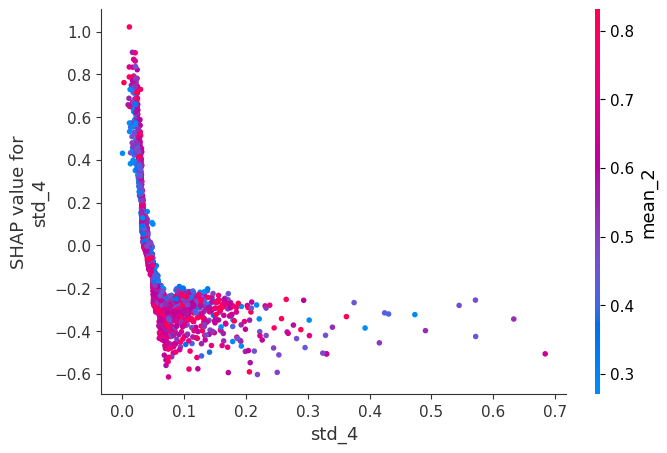

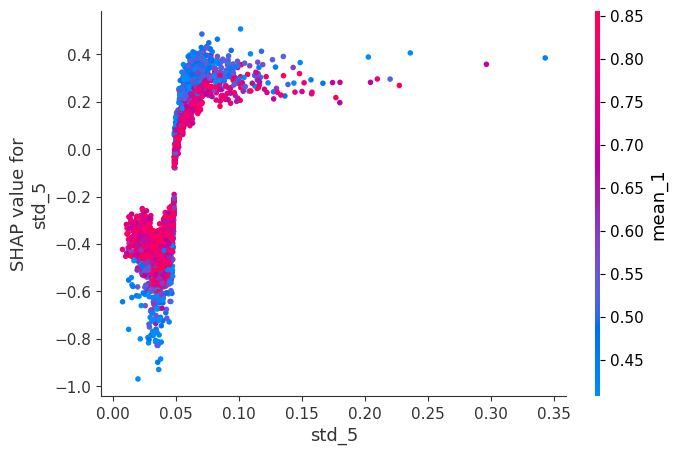

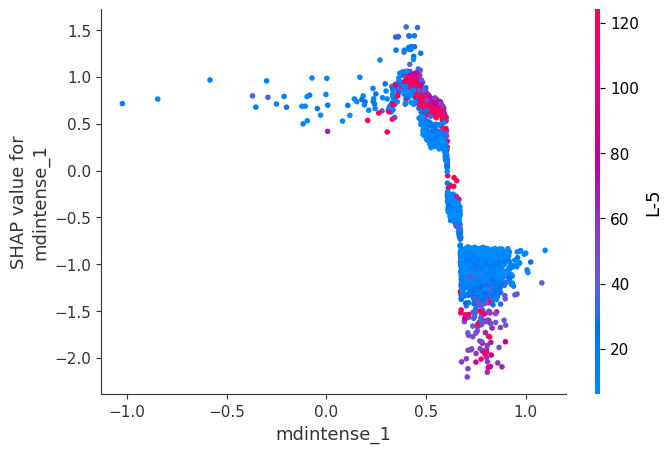

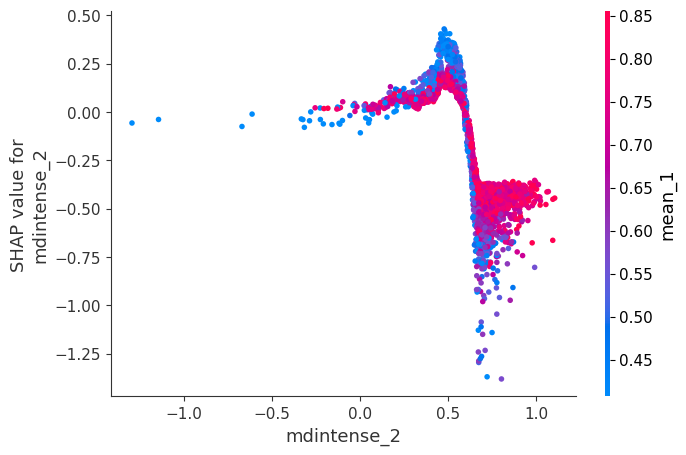

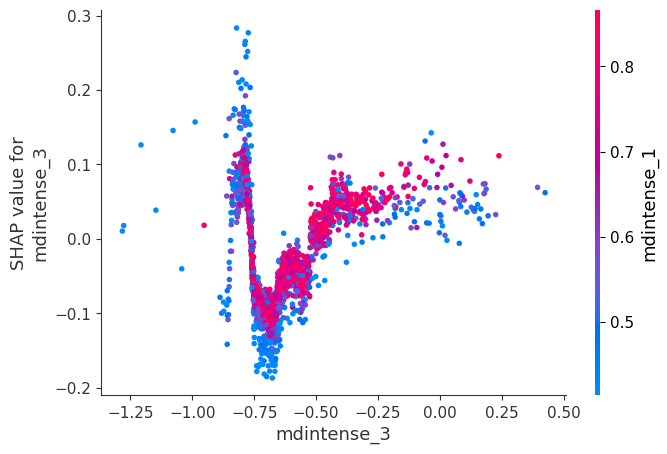

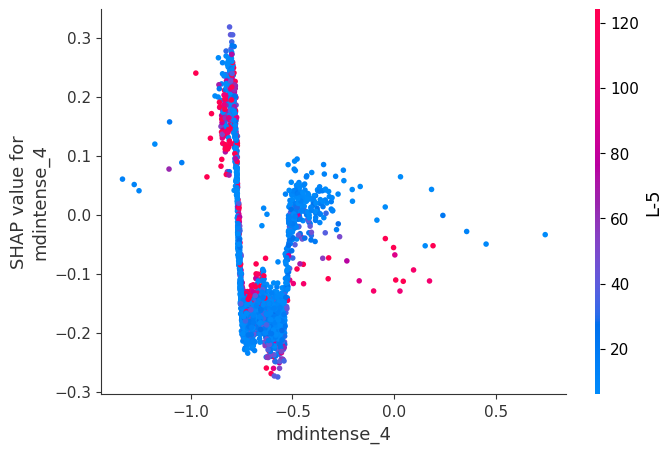

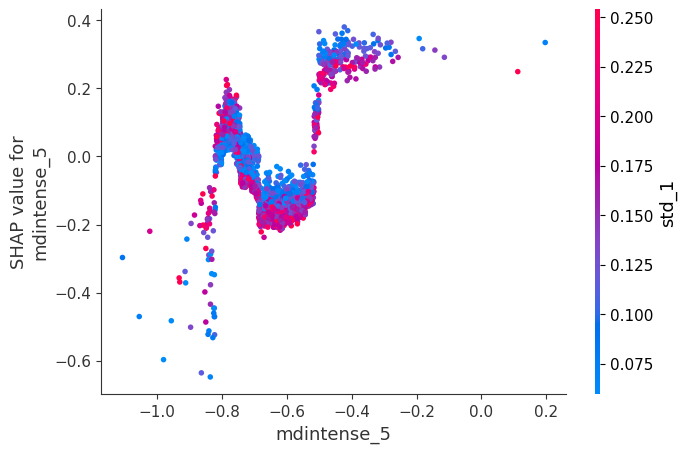

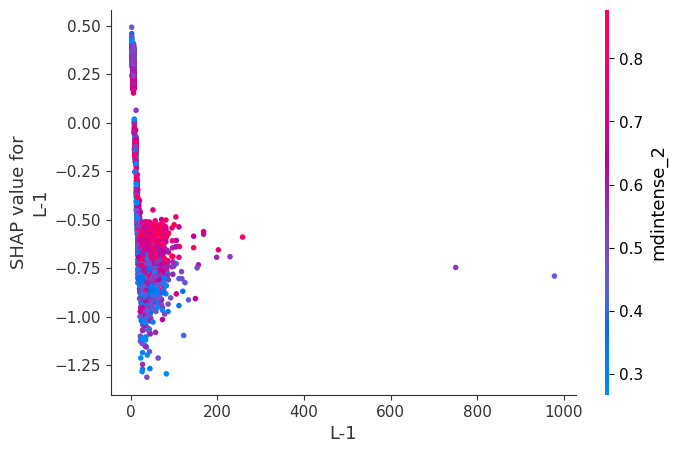

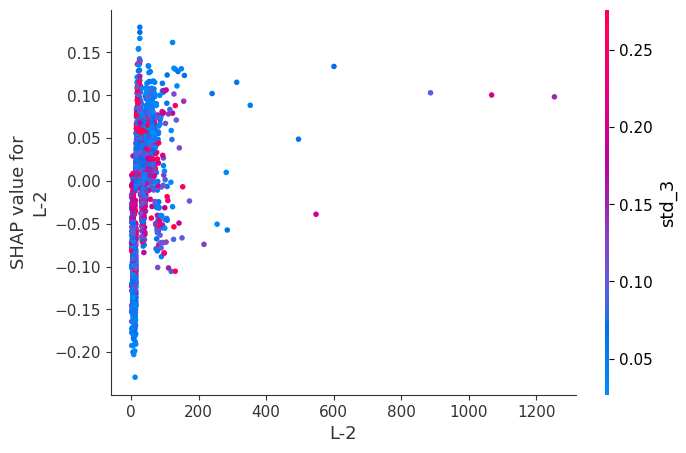

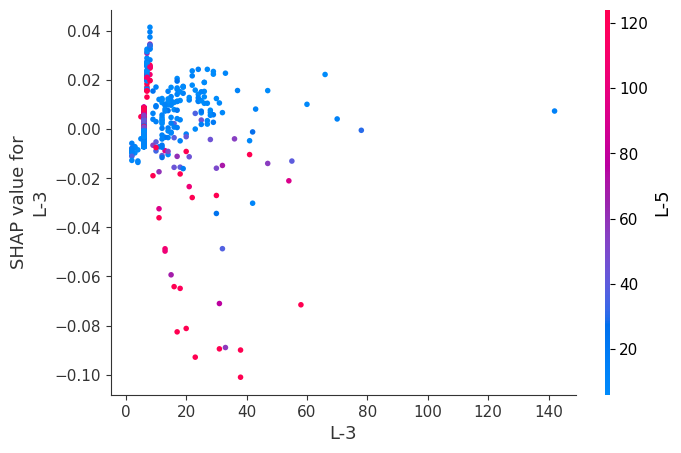

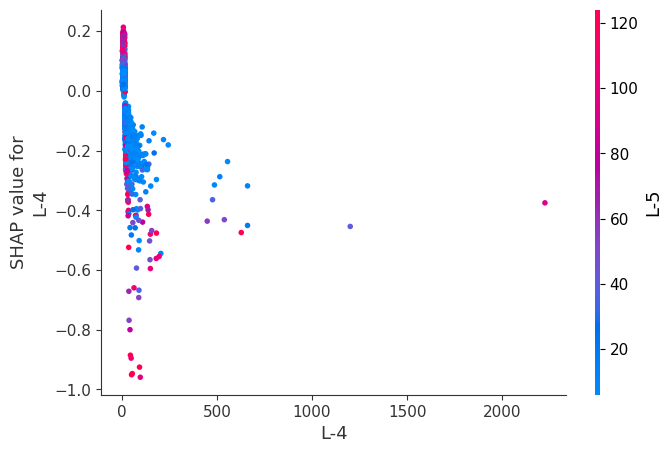

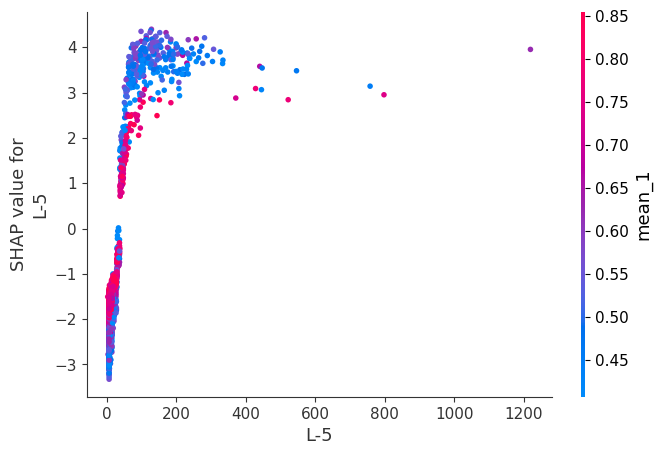

In [16]:
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, X, display_features=X)

# Demo2
https://www.kaggle.com/code/diegovicente/using-shap-values-for-interpretability


https://www.kaggle.com/code/ritzig/classification-feature-selection-shap-tutorial

In [17]:
import numpy as np
import pandas as pd
import xgboost as xgb

from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, roc_auc_score

import matplotlib.pylab as pl
import matplotlib.pyplot as plt
import seaborn as sns
import shap

shap.initjs()
%matplotlib inline

np.random.seed(3)

In [21]:
dataset=pd.read_csv('/home/jiayi/5moU/data/DL_fromTombo/all_AGTTC.csv')
dataset

indx   kmer    mean_1    mean_2    mean_3    mean_4    mean_5     std_1  \
0      260  AGTTC  0.513199  0.397293 -0.850444 -0.837177 -0.786233  0.047088   
1      259  AGTTC  0.589209  0.568374 -0.717482 -0.762448 -0.789418  0.062266   
2      243  AGTTC  0.458838  0.109656 -0.797939 -0.820008 -0.756034  0.149853   
3      260  AGTTC  0.457595  0.472804 -0.688376 -0.681815 -0.679743  0.060894   
4      260  AGTTC  0.528384  0.423719 -0.713185 -0.825872 -0.800544  0.029393   
...    ...    ...       ...       ...       ...       ...       ...       ...   
2628   260  AGTTC  0.787659  0.405793 -0.611869 -0.739305 -0.605124  0.169036   
2629   161  AGTTC  0.396310  0.499622 -0.619268 -0.546544 -0.762006  0.090910   
2630   240  AGTTC  0.589990  0.614284 -0.632994 -0.789089 -0.753708  0.172348   
2631   260  AGTTC  0.661435  0.551367 -0.694797 -0.734620 -0.571503  0.110638   
2632    33  AGTTC  0.695724  0.689144 -0.430299 -0.333123 -0.287625  0.108741   

         std_2     std_3  ...  mdintense_2  mdintense_3  mdintense_4  \
0     0.272815  0.031234  ...     0.471305    -0.846254    -0.839970   
1     0.080098  0.038712  ...     0.579342    -0.727349    -0.763294   
2     0.419986  0.034345  ...     0.190347    -0.796560    -0.817250   
3     0.174125  0.025067  ...     0.513802    -0.686393    -0.686393   
4     0.277885  0.162593  ...     0.522379    -0.768558    -0.826600   
...        ...       ...  ...          ...          ...          ...   
2628  0.279195  0.138040  ...     0.463995    -0.667700    -0.744655   
2629  0.031997  0.130815  ...     0.500937    -0.642935    -0.607435   
2630  0.280588  0.188418  ...     0.688070    -0.685807    -0.796713   
2631  0.231089  0.049018  ...     0.548295    -0.676666    -0.739763   
2632  0.156471  0.050444  ...     0.696973    -0.444039    -0.335371   

      mdintense_5  L-1  L-2  L-3  L-4  L-5  label  
0       -0.768751    6   81    6   15  104      1  
1       -0.799239    6   32    6   15   90      1  
2       -0.755180   13    6    6   33   63      1  
3       -0.696311    6   78    6   13  108      1  
4       -0.792575    6   51    6   11  108      1  
...           ...  ...  ...  ...  ...  ...    ...  
2628    -0.604325   32   14    6   11   17      0  
2629    -0.786905   39    6    6   16   16      0  
2630    -0.751445    6   40    6   19    6      0  
2631    -0.576580   33   34    6   11    6      0  
2632    -0.290405    6   56    6   20   31      0  

[2633 rows x 23 columns]

In [18]:
kfolds = KFold(n_splits=5, shuffle=True)

In [19]:
param = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'eta': 0.2,
    'silent': 1,
    'nthreads': 2,
}

num_round = 10

thres = 0.5

In [27]:
row_names=[dataset.columns]
row_names

[Index(['indx', 'kmer', 'mean_1', 'mean_2', 'mean_3', 'mean_4', 'mean_5',
        'std_1', 'std_2', 'std_3', 'std_4', 'std_5', 'mdintense_1',
        'mdintense_2', 'mdintense_3', 'mdintense_4', 'mdintense_5', 'L-1',
        'L-2', 'L-3', 'L-4', 'L-5', 'label'],
       dtype='object')]

In [34]:
features = ['mean_1', 'mean_2', 'mean_3', 'mean_4', 'mean_5',
        'std_1', 'std_2', 'std_3', 'std_4', 'std_5', 'mdintense_1',
        'mdintense_2', 'mdintense_3', 'mdintense_4', 'mdintense_5', 'L-1',
        'L-2', 'L-3', 'L-4', 'L-5']
target = 'label'

#X = dataset[features]
X=dataset.iloc[:,2:dataset.shape[1]-1]
y = dataset[target]

In [35]:
cnf = list()
auc = list()

for train_idx, test_idx in kfolds.split(X):
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_test, y_test = X.iloc[test_idx], y.iloc[test_idx]
    
    param['scale_pos_weight'] = (y_train.size - y_train.sum()) / y_train.sum()    
    
    xg_train = xgb.DMatrix(
        X_train.values, feature_names=features, label=y_train.values
    )
    xg_test = xgb.DMatrix(
        X_test.values, feature_names=features, label=y_test.values
    )
    
    watchlist = [(xg_train, 'train'), (xg_test, 'test')]
    bst = xgb.train(param, xg_train, num_round, watchlist, verbose_eval=False)
    preds = bst.predict(xg_test)
    
    cnf.append(confusion_matrix(y_test, (preds > thres).astype(int)))
    auc.append(roc_auc_score(y_test, preds))
    
cnf = sum(cnf)
auc = sum(auc) / len(auc)

'Average AUC: {:.04f}'.format(auc)    

[11:00:13] WARNING: ../src/learner.cc:767: 
Parameters: { "nthreads", "silent" } are not used.

[11:00:13] WARNING: ../src/learner.cc:767: 
Parameters: { "nthreads", "silent" } are not used.

[11:00:13] WARNING: ../src/learner.cc:767: 
Parameters: { "nthreads", "silent" } are not used.

[11:00:13] WARNING: ../src/learner.cc:767: 
Parameters: { "nthreads", "silent" } are not used.

[11:00:13] WARNING: ../src/learner.cc:767: 
Parameters: { "nthreads", "silent" } are not used.



Pass `evals` as keyword args.
Pass `evals` as keyword args.
Pass `evals` as keyword args.
Pass `evals` as keyword args.
Pass `evals` as keyword args.


'Average AUC: 0.9930'

Text(58.222222222222214, 0.5, 'Observation')

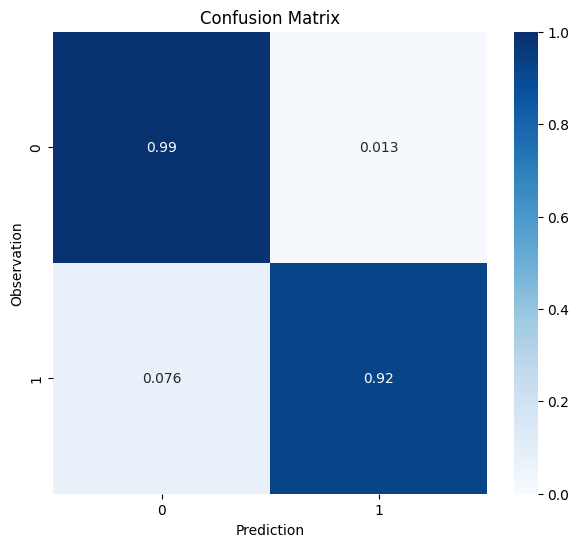

In [36]:
fig, ax = plt.subplots(figsize=(7, 6))

normalized_cnf = cnf / cnf.sum(axis=1).reshape(-1, 1)

sns.heatmap(normalized_cnf, annot=True, cmap="Blues", ax=ax, vmin=0, vmax=1)
ax.set_title('Confusion Matrix')
ax.set_xlabel('Prediction')
ax.set_ylabel('Observation')

In [37]:
explainer = shap.TreeExplainer(bst)
shap_values = explainer.shap_values(X)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


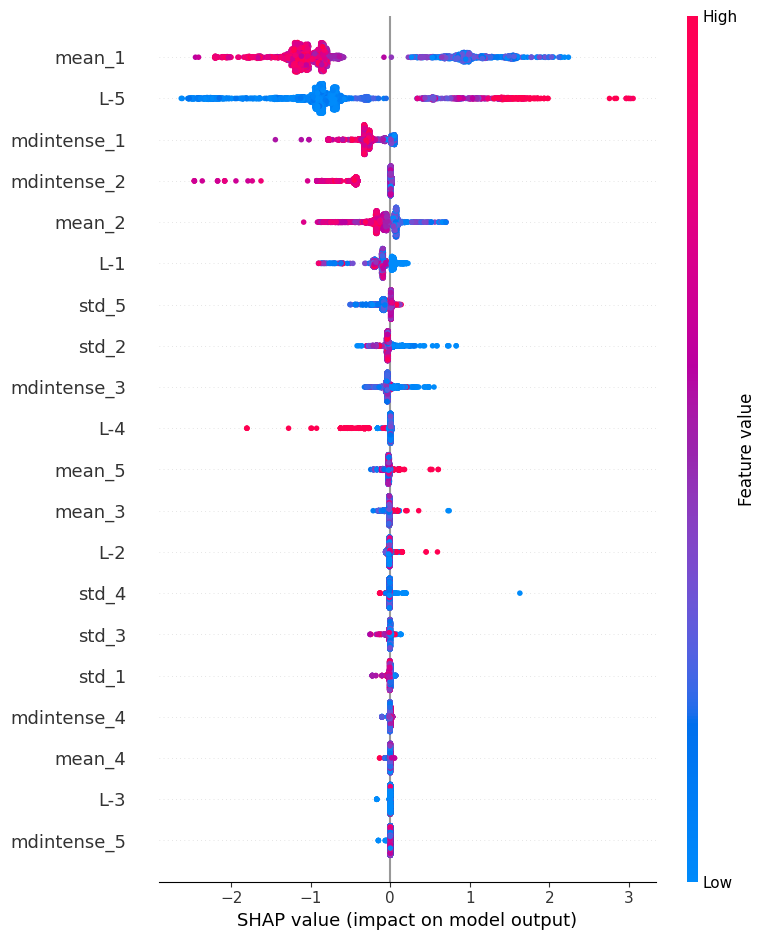

In [38]:
shap.summary_plot(shap_values, X) 

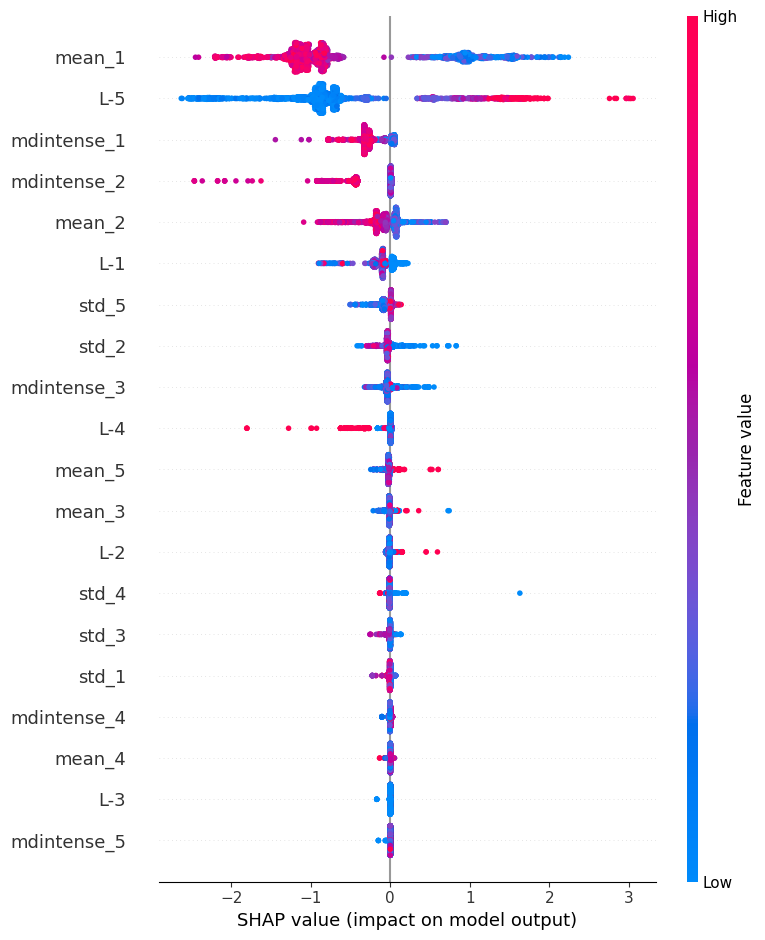